In [1]:
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re

from utility import *

In [2]:
replace_dict = {
     -9:'missing',
      1:'tellaye',
      2:'aye',
      3:'both',
      4:'no',
      5:'tellno'}

In [3]:
BES_data_folder = '../BES_analysis_data/'
PublicWhip_folder = create_subdir(BES_data_folder,"PublicWhip")
import os
directory = os.fsencode(PublicWhip_folder)

In [ ]:
# https://www.publicwhip.org.uk/data/ideas-marginal.txt
    
#     Ideas of things that could be done with Public Whip data, or similar.
# I don't intend to do any of them, as they don't fit my goals - but they
# might give you useful suggestions.  There are probably a few political
# science papers in here.

# Some similar things done with US voting data:
# http://stat.columbia.edu/~jakulin/Politics/index.htm

# Party politics
# --------------

# Table of most rebellious by party - so see most rebellious Con and LDem.
# At the moment only Labour show up.
# Table of highest attendance by party - similarly.
# Rankings on rebellion/attendance PER PARTY

# Compare attendance rates between parties, as they go in and out of
# government over the years  (use raw data "Extra Turnout" uses)
# Compare rebellion rates between parties

# Find out must rebellious divisions by party
#     e.g. find out what issues are fracturing the Tories

# Statistics by party - e.g. attendence rate. 
# How rebellious a party it is. etc.

# Proportion of abstentions within each party, may reveal times when MPs abstain in protest.  

# % of completely pliant MPs in each party, who always follow whip.

# Do Co-op members ever vote against Labour as a group?

# Academic analyses (of no short term practical political benefit)
# -----------------

# Graph of how many MPs defect in each vote over time
# Watch for loyalty going down after start of term, to lowest at midterm,
# then up again

# Analyse if MPs who are "sir" vote differently in anyway
#     first check data integrity that title always has "Sir" for knights
# Get data on gender etc. and analyse against that

# Regional analysis.  Scotland, NI, Wales, North v South.  Urban v.  Rural.  
# Area of land for constituency.  This gives a "ruralness" measure.
# Population of constituency.
# Distance of constituency from London vs. attendance rate

# Integrate parliamentary majority, and look for correlations with
# rebelliousness?  Majorities here:
#     http://www.psr.keele.ac.uk/area/uk/mps.htm
# (Should be no correlation, as reselection more important?)
# Plot majority as a colour on the cluster diagram
# dONE - no correlation.  see website/custom/majority-rebellions.png

# First term MPs vs. old warhorses.  More rebellious?  Less attentive?

# Find people who have telled the most times

# Cluster distractions (geek fun, but pointless)
# --------------------

# Make clustering cope with tellaye/tellno
# Make cluster stuff store NUMBER OF VOTES both voted in for extra possible friends info

# Chris Lighthead:  "I've now written some code to estimate which of the
# eigenvectors are significant. The basic idea is that we generate
# synthetic data using the marginal  distributions for each statements --
# that is, like the data which would have been produced by the same number
# of respondents as have completed the real survey, but  as if their
# answers to any one question were unrelated to all the others; and having
# done that, we perform the principal components analysis on the synthetic
# data. The idea here is that we can compare the eigenvalues from the
# synthetic data to the eigenvalues from the real data. If the real
# eigenvalue is significantly larger than the one from the synthetic data,
# it likely represents real variation in the data; otherwise, random
# variation." - we could do this with MP clustering.

# Improve clustering distance algorithm
#     See J Vaughan suggestions

# Colour dots in cluster diagram by how many times they have voted.
# Bright colours for more relevant the data - i.e. how many intersections
# with other's votes there are.

# Play with stuff in vector search article
# http://www.perl.com/pub/a/2003/02/19/engine.html
# In particular PDL for speeding up octave algebra stuff

# >    Idea 2.  Darren suggested that the reason Tony Blair is an outlier
# >    in the java app is coz he only turns up to votes he thinks are
# >    going to be controversial, hence ones that people are probably
# >    going to vote against him.
# Find a metric to see if this is the case.

# Make cluster diagram for just divisions relating to one issue.  Or
# for one person's interested issues.  Plot point on cluster diagram for
# issues themselves.
# [I've tried this, with not that useful results - Francis:
# - I've made a cluster diagram with just the Iraq votes in.
#   Unfortunately it isn't really revealing, kind of curious, but I'm not
#   sure how useful it is in the media.  Maybe you have suggestions
#   otherwise!  Find a static screenshot attached.

#   Anti-war on the left, pro-war on the right.  Colours represent
#   political party.  Unfortunately, lots of the dots represent dozens of
#   MPs when they all voted the same, so the distribution is much denser
#   to to the right than it at first appears.  It's interesting that Con
#   and Lab still separate out top to bottom... We almost end up with four
#   corners.

#   Top-left:  Anti-war, anti-government
#   Top-right: Pro-war, anti-government
#   Bottom-left: Anti-war, pro-government
#   Bottom-right: Pro-war, pro-government

#   However, this doesn't really tell us anything we didn't already know. ]

# EDM analysis with MDS:
# http://www.stats.bris.ac.uk/~magpn/Research/Politics/

# Written Answers
# ---------------

# Here's a couple of ideas: a section called "answers that are in the Library".

# Also, if we find enough funny business, what about, random question of
# the day?  People could subscribe to this, and this would get them involved.


# Miscellaneous
# -------------

# Create classification tree so it offers some division questions for you
# to pick from, and tells you your party.  As does here for EDMs:
# http://www.stats.bris.ac.uk/~magpn/Research/Politics/whovote.htm

# Find "Motion made, and Question proposed," and "Question put and agreed
# to." when there was no division.  Record these "virtual divisions" as
# divisions, as they are really, just they were totally uncontested for
# whatever reason.  Count them up and see where and how many there are,
# whether there are more near bedtime etc.

# What can we learn from the information that aye/no comes first, and
#     from the information as to whether government or not government is
#     aye or no?

# Measure lobbying power behind each issue (expenditure by interested
# parties).  Again, correlate to time spent on it.

# Value of the vote.  What is the monetary expenditure cost of agreeing
# the motion?  Graph against time spent discussing, and see how silly the
# correlation is.

# Measure a sudden drop in attendance rate - so you could see that the MP
# used to vote a certain % of the time and now doesn't.  This will 
# detect illness/injury/busy for some other reason.



In [ ]:
# https://www.publicwhip.org.uk/data/ideas.txt
    
# Data anlaysis (using existing data)
# -------------

# Rebels who voted against this division, also voted against this division...
# This is flipping the possible friends on its head.  Find friends between
# divisions.  Distance metric between divisions - how many MPs (out of
# MPs that were present in both divisions) voted the same.

# "Performance tests" for government - turning excessive monitoring and
# testing back onto them.
# corruptometer, loyaltometer, evilness, sleepometer, waffle-meter
# Top day of week for voting.  Distribution for individual MPs.
# - this person is never there on Thursdays!

# Use abstention rates to highlight interesting divisions, where lots of
# people didnt turn up.
# Pick divisions with extreme "Extra Turnouts" (for the main parties) -
# these will be interesting
# Plot "Extra Turnout" over time - so can see how abstention rates change.

# Show the majority for each vote (how much it was won by)

# Additional numeric data
# -----------------------

# Put time of division, so can work out importance (late at night less
# governmental)
# Also length of debate leading up to division
# Intended length of debate

# It is worth looking for MPs who spoke but did not vote.  This is a good
# way to detect active abstentions.  It may also have all sorts of other
# interesting meanings.
# division.php?date=2003-06-10&number=224&showall=yes
# Count how many times MP spoke in a debate, or on the day

# How many articles do Labour MPs supply to the Times, for example?
# Collate all MPs articles in newspapers

# Provide local program for pressure groups.  Parses their list of
# post-code membership, and creates a table of MPs who are doing the least
# where the group has the most supporters.  Finds good targets for
# lobbying.

# Correlate voting record with geographical location.  Do MPs at constituencies
# near each other tend to vote the same as each other?

# Cost in pounds / word of an MP

# Additional text content
# -----------------------

# House of Lords divisions

# When Dream MP gives votes more context, allow anyone to vote on any division.  
# Perhaps they have to give their postcode first.

# Issue sub-selector.  User can log in, name an issue, and say which way
# votes should have gone to satisfy him on that issue.  Get all manner of
# people to make issues for next general election.
# - info to help select which votes and which way should have voted
# - SP adopters / constituency
# - Auto email to adopters in each ward
# - include journalism, so a comment on the issue / on each vote
# - who made the issue is crucial, as some expertise is needed, and
#   viewers of the site need to understand any bias that they have
# - Report to take into your MP constituency surgery
# - Let NGO entere postcodes of their supporters (in their own client app)
#   and use these to find MPs where the most people agree with the issue,
#   but the MP has voted the other way.
# Do Iraq subselection ourselves
# Do climate change subselection

# Software to follow all legislation sources:
#      - parliamentary bills - which can be introduced into either House
#      - white papers - on the parliamentary website I think
#      - green papers - not sure
#      - other consultative papers issues by departments
#      - consultative papers issues by other statutory bodies such as regulators
#      - papers from the downing st Performance and Innovation Unit
#      - EDMs  
#      - private members bills
#      - 10 minute rule bills
#      - EC directives which have to be implemneted in domsetic law
#      - the Queen's speech
#      - international treaties which apart from major EU treaties are ratified
#      under the Ponsonby Rule without a vote in parliament.

# Link from division to draft of Bill which is being debated
#     http://www.parliament.uk/what_s_on/what_s_on.cfm
#     http://www.parliament.the-stationery-office.co.uk/pa/cm200203/cmstand/cmstand.htm
#     http://www.parliament.the-stationery-office.co.uk/pa/pabills.htm
#     http://bills.ais.co.uk
#     http://news.bbc.co.uk/1/hi/programmes/bbc_parliament/3370535.stm

# Group votes by Whitehall department, so you can see areas of interest
# (idea from Sirius at Oxfam)

# Put in EDMs, so can see who supports an EDM and follows it through to
# actual vote (idea from Sirius at Oxfam)
# http://edm.ais.co.uk/

# Analyse an MP's interests by their rebellions - work out a summary of
# their special interests.  Also link to which debates they spoke in.

# Committees, and voting in committee

# Written answers
# ---------------

# Print department
# Match office (secretary of state...) to department?  Julian does this already
# prob, check how it works and use it in all the tables, as it is useful at-a-glance
# information.

# uk.org.publicwhip/wrans/2003-11-06.755W.4 - refers to uk.org.publicwhip/wrans/2003-06-03.214W
# which does actually exist, but crosses over two entire columns, so referencing the one in the middle doesn't pick it up.  Ooops.  Need some kind of ranging?
# uk.org.publicwhip/wrans/2003-11-06.726W.0 - there is a phrase referring to debates, but the
# link is given to wrans ;)
# uk.org.publicwhip/wrans/2003-11-06.725W.2 - has a offrep which isn't there (as well
# as two which we don't have indexed yet)
# uk.org.publicwhip/wrans/2003-10-27.110W.2 - fails to find offrep

# Back links to wrans that have referred to this one
# Check all found URL links

# Improve all MP name matching so no unknown ids
# Make "unknown" name link a better page (rather than a meaningless error)
#     Fix broken links to mp.php?id=unknown

# Stats - count up how many questions/answers each person has done
# Some kind of "most inquisitive" on front page

# League table of unanswered written questions

# Search for all questions that are about Hansard that you can now answer, and send off the answers.

# Give help on how to request answers from hcinfo

# Usability
# ---------

# Policy syndication:
# http://www.livejournal.com/developer/embedding.bml
# Javascript, make .js file with just a "document.write"
# Inline frames, just inline to HTML file
# CGI script / serverside include

# List of all divisions and how an MP voted in them, including ones he
# wasn't present at.  So you could see which ones they weren't at easily.
# Kind of makes sense.

# Abstain -> difference from expected
# Expected -> average no. of attendees
# visually draw guesses further right

# Pass W3C validator
# http://validator.w3.org/
# And bobby

# Letter index on MP list

# Pie chart, rectangle graph by area for voting table

# Email reports to people when search queries change
# e.g. When your MP has voted.  When he has rebelled.  When an issue is
# voted on, and so on.
# RSS feed of your MP's votes

# Link from MP to other sources of info 
#     - Ask Aristotle
#     - Fax your MP
#     - Speeches on Hansard
# Link from search engine to
#     - link to search Hansard?

# Links to other political resource websites

# Print reason left parliament in table at top of mp.php

# links.php - takes links to days and chunks, does a redirect reduce
# bandwidth, and do tracking of where people link through to

# Put divisions on same day as easy links from division page
# Put similar divisions on links

# META keywords (for search engine description)

# Colour blind people, or indeed blind people, need a better rebel marker
# than redness in MPs division list.  Boldness is one idea.

# Log failed searches so we can improve the search engine

# mod_gzip to reduce bandwidth
# Make sure fast CGI keeps db connections somehow
# Share DB connection with main code and registration code
# Use hotcopy or similar for new db uploading
#     http://www.mysql.com/doc/en/mysqlhotcopy.html

# Paragraph text needs max-width, so it can be shrunken

# - about the authors, so feels personal to people
# - consider breadcrumb trail
# - about section (not all FAQ?)
# - company name/logo at topleft, search at topright
# - print stylesheet media="print" removing menus

# > (One comment: obviously all your pages are going to get
# > indexed in, e.g., Google fairly shortly. For some search
# > terms -- names of obscurer MPs and of pieces of
# > legislation -- you'll be quite high up the results. It
# > might be worth putting a one-sentence description of the
# > project at the top of each results page to explain what's
# > going on, since some of the pages might look a touch
# > confusing for the first-time visitor.)

# Political toolbar - easy searches.  Popup links automatically on MP's
# names in Internet Explorer.

# Java in Opera Win32

# Gimmicks
# --------

# MP wallplanner - show their diary

# Fantasy party/cabinet, based on voting.
# Virtual top trumps - choose your favourites, play them, lose them, try
# to get ones whose careers are on the up.

# Real top-trump cards (rebelliousness, attendance, term of office, majority, age...)
# Pick, say, 1997 parliament - or maybe becomes more journalistic/historical,
# as you want the cards to represent the MP at their most significant moment
# in time.

# Actually post a whipping sheet to MPs.  This would arrive every week at
# the same time as their party whipping sheet.  It would tell them how
# many voters in their constituency have registered with organisations which
# would like them to vote particular ways.
# Decentralised - get our mailing list subscribers to print the PDF and
# post it to them.

# Local newspapers - similarly contact them.

# Make big wall chart of cluster diagram - colour, pretty
# Maybe even sell it to people

# Stand as Public Whip candidate in election with manifesto to do as your
# constituents want.  

# "Totally toady" to "Usual suspect"

# Broader context
# ---------------

# European Parliament.  
# Minutes here:
# http://www3.europarl.eu.int/omk/omnsapir.so/calendar?APP=PV1
# Attendance rates are pre processed here:
# http://www.europarliament.net/

# Do it for all Hansards in CHEA:
# http://www.hansard-westminster.co.uk/links.asp

# Indian parliament.  Give them clustering.
# Form UK equivalents of:
# "Committee for Assurances" - track all promises
# "Committee for Attendance" - see which seats should be declared vacant
# "Spectrum of Interest" - what subjects in career they followed, so can
# tell if would be no use as Minister for Education
# Analyse all task MP does, time spent, and see if they are doing either
# enough or implausibly too much.

# Dublin parliament
# http://www.oireachtas-debates.gov.ie/

# Letter writing campaign by their constituents to MPs who use procedure
# in an entirely negative way - for example here, when Labour maliciously
# moved the house to sit in private, in order to stop the democratic
# discussion of the role of ministerial advisers
# http://www.publications.parliament.uk/pa/cm200203/cmhansrd/cm030314/debtext/30314-19.htm

# About one MP
# ------------

# Name (title, first, last)
# Photo
# Party (link to party website)
# Parliamentary terms served 
# Failed candidacy
# Home page
# Constituency address / phone / fax
# Parliament address / phone / fax
# Email
# Surgery times
# Date of birth
#     http://www.parliament.uk/directories/hciolists/alms.cfm
#     http://www.psr.keele.ac.uk/area/uk/mps97.htm
#     http://www.psr.keele.ac.uk/area/uk/mps.htm
#     http://www.election.demon.co.uk/strengths.html

# Bio (journalistic)
#     http://www.politicallinks.co.uk
#     http://www.dodonline.co.uk/politics2/BIOG/MP_BIOGS/bio.asp?id=0163

# Salary
# Expenses - London stay (£150/night!), motoring
# Pension
# Include pay from members interests
# http://www.parliament.uk/faq/pay_faq_page.cfm

# Register of interests
#     http://www.parliament.the-stationery-office.co.uk/pa/cm/cmregmem
# Donations they have made (to political parties?)
#     http://www.cleanpolitix.com
# Entry from Who's who
# Company directorships
# Links to info on companies involved with

# Recent speeches (text)
#     http://www.publications.parliament.uk
# Voting record
#     http://www.publications.parliament.uk/pa/cm/cmhansrd.htm
# Committee membership
# Bills placed before parliament
# Video of them in parliament (or elsewhere)
# Written questions asked and answered

# Local council positions
# Mayorships

# Responsiveness to faxes (also photo?)
#     http://www.faxyourmp.com/stats.php3
# Voting activity
# Number of questions asked
# Time spent in parliament

# News mentions (Google news)
# Weblog mentions
# Search engine hits
# Links to their home page

# Comments/user provided links
# As much data historical, as well as current

# Sources:
# http://politics.guardian.co.uk/person/0,9290,-816,00.html
# http://www.epolitix.com

    

In [ ]:

# dfs = []
# meta_dict = {}
# descr_dict = {}
# column_dict = {}
# count = 0


In [205]:
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".dat"): 

        file_name_base = filename.split(".dat")[0]
#         file_name_base = "votematrix-2010"


        df = pd.read_csv(PublicWhip_folder+file_name_base+'.dat',sep='\t')

        # MP votes for each division
        # The .dat files are tab-separated text files for loading into a spreadsheet.
        # They contain a matrix of every vote of each MP/Lord in each division.
        # The columns are headed by the identifiers of the MPs/Lords, and the rows begin with the date,
        # number and title of the division. Each .txt file explains what number represents aye, no, abstain
        # and so on, and gives a key to the MP/Lord identifiers.

        # Divisions x MPs

        df[search(df,"mpid").index] = df[search(df,"mpid").index].replace(replace_dict).astype('category')
        df["date"]=df["date"].apply(lambda x: pd.to_datetime(x))
        
        df.to_csv(PublicWhip_folder+file_name_base+"_matrix.csv")

        df2 = pd.read_csv(PublicWhip_folder+file_name_base+'.txt',sep='\r\n',header =None)
        file_string = df2.loc[0].values[0]
        file_created_string = df2.loc[1].values[0]
        num_mps = int( df2.loc[2].values[0].split(" mps")[0] )
        num_divisions_string = int( df2.loc[3].values[0].split(" divisions")[0] )
        print(file_string)
        print(file_created_string)
        print(num_mps)
        print(num_divisions_string)

        df3 = pd.read_csv(PublicWhip_folder+file_name_base+'.txt',sep='\t',skiprows =19)
        df3["party"] = df3["party"].astype('category')
        # party - object -> categorical
        # mpid - unique int64
        df3 = df3[['mpid', 'firstname', 'surname', 'party']]
        
        df3.to_csv(PublicWhip_folder+file_name_base+"_mps.csv")

        # https://www.publicwhip.org.uk/mp.php?mpid=40289

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\ipykernel_launcher.py:25: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


file: votematrix-1992.csv covering commons parliament 1992
file created: Wed Jul 18 11:17:58 2018by http://www.publicwhip.org.uk/
655
0
file: votematrix-1997.csv covering commons parliament 1997
file created: Mon Jan  6 19:21:32 2020by https://www.publicwhip.org.uk/
679
1273
file: votematrix-2001.csv covering commons parliament 2001
file created: Mon Jan  6 19:21:30 2020by https://www.publicwhip.org.uk/
672
1246
file: votematrix-2005.csv covering commons parliament 2005
file created: Mon Jan  6 19:21:27 2020by https://www.publicwhip.org.uk/
657
1288
file: votematrix-2010.csv covering commons parliament 2010
file created: Thu Jan  2 19:20:37 2020by https://www.publicwhip.org.uk/
664
1226
file: votematrix-2015.csv covering commons parliament 2015
file created: Mon Jan  6 19:21:22 2020by https://www.publicwhip.org.uk/
654
467
file: votematrix-2017.csv covering commons parliament 2017
file created: Mon Jan  6 19:21:20 2020by https://www.publicwhip.org.uk/
1299
465
file: votematrix-lords.cs

In [114]:
df

,rowid,date,voteno,Bill,mpid100001,mpid100002,mpid100003,mpid100004,mpid100005,mpid100006,...,mpid101484,mpid101485,mpid101486,mpid101487,mpid101489,mpid101494,mpid101495,mpid101496,mpid101498,Unnamed: 1308
0,34138,2019-10-23,1,Freedom of Establishment and Free Movement of ...,missing,missing,missing,aye,missing,missing,...,aye,missing,missing,aye,no,no,no,no,no,
1,34100,2019-09-06,2,European Union (Withdrawal) (No. 6) Bill - <i>...,missing,missing,missing,no,no,missing,...,no,missing,missing,missing,missing,missing,missing,missing,missing,
2,34099,2019-09-06,1,European Union (Withdrawal) (No. 6) Bill - <i>...,missing,missing,missing,no,missing,missing,...,no,missing,missing,missing,missing,missing,missing,missing,missing,
3,34098,2019-09-04,17,Business of the House - <i>Motion on Standing ...,missing,missing,missing,no,no,missing,...,no,no,missing,missing,missing,missing,missing,missing,missing,
4,34097,2019-09-04,16,Business of the House - <i>Motion on Standing ...,missing,missing,missing,no,no,missing,...,no,no,missing,missing,missing,missing,missing,missing,missing,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,23888,2000-01-20,1,Criminal Justice (Mode of Trial) Bill [H.L.],aye,aye,missing,aye,missing,no,...,missing,missing,missing,missing,missing,missing,missing,missing,missing,
2166,24002,2000-01-18,1,Kent County Council Bill [H.L.],missing,missing,missing,no,missing,no,...,missing,missing,missing,missing,missing,missing,missing,missing,missing,
2167,23930,1999-12-09,1,House of Lords' Offices: Select Committee Report,no,no,missing,missing,missing,missing,...,missing,missing,missing,missing,missing,missing,missing,missing,missing,
2168,24041,1999-12-02,1,Succession to the Crown (Amendment),no,missing,missing,missing,missing,missing,...,missing,missing,missing,missing,missing,missing,missing,missing,missing,


In [112]:
df3

,mpid,firstname,surname,party
0,40289,Diane,Abbott,Lab
1,40684,Debbie,Abrahams,Lab
2,40523,Nigel,Adams,Con
3,40661,Adam,Afriyie,Con
4,40185,Bob,Ainsworth,Lab
...,...,...,...,...
659,40339,Jeremy,Wright,Con
660,40459,Simon,Wright,LDem
661,40554,Tim,Yeo,Con
662,40452,George,Young,Con


In [71]:
df[search(df,"mpid").index].stack().value_counts()

no         278172
aye        276074
missing    255043
tellno       2288
tellaye      2288
both          199
dtype: int64

In [84]:
df["date"].value_counts()

2012-02-01    11
2010-07-21     9
2010-10-20     9
2012-02-08     9
2013-04-16     9
              ..
2014-01-24     1
2014-04-29     1
2011-11-25     1
2011-06-23     1
2011-02-03     1
Name: date, Length: 457, dtype: int64

In [80]:
df["voteno"].value_counts()
# rowid unique
# date - object -> datetime, not unique
# voteno - not unique, 1-544
# Bill - object, not unique

1      4
88     4
112    4
113    4
114    4
      ..
372    1
373    1
374    1
375    1
544    1
Name: voteno, Length: 544, dtype: int64

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


file: votematrix-2010.csv covering commons parliament 2010
file created: Thu Jan  2 19:20:37 2020by https://www.publicwhip.org.uk/
664
1226


In [86]:
df3["party"].value_counts()

Con            307
Lab            272
LDem            58
DUP              8
SNP              6
PC               3
SDLP             3
UKIP             2
Independent      2
Green            1
Alliance         1
Respect          1
Name: party, dtype: int64

In [102]:
df.dtypes

rowid                    int64
date            datetime64[ns]
voteno                   int64
Bill                    object
mpid40034             category
                     ...      
mpid40702             category
mpid40703             category
mpid40704             category
mpid40705             category
Unnamed: 668            object
Length: 669, dtype: object

In [117]:
df[search(df,"mpid").index].stack().value_counts()

missing    2226541
no          319151
aye         275382
tellno        4307
tellaye       4299
dtype: int64

In [146]:
file_name_base = "votematrix-2015"
matrix = pd.read_csv(PublicWhip_folder+file_name_base+"_matrix.csv", index_col = "Unnamed: 0")
mps = pd.read_csv(PublicWhip_folder+file_name_base+"_mps.csv", index_col = "Unnamed: 0")


# MPS are doubled - looks like it's so it stores their behaviour before/after splits
matrix.shape,mps.shape

((467, 659), (654, 4))

In [119]:
# file_name_base = "votematrix-2017"
# matrix = pd.read_csv(PublicWhip_folder+file_name_base+"_matrix.csv")
# mps = pd.read_csv(PublicWhip_folder+file_name_base+"_mps.csv")


# # MPS are doubled - looks like it's so it stores their behaviour before/after splits


In [208]:
# df = pd.get_dummies(matrix[search(matrix,"mpid").index]).T
# df_cols = df.columns
# df_ind = df.index

In [147]:
replace_dict_2 = {"no":0,
 "aye":1,
 "missing":np.nan,
 "tellaye":1,
 "tellno":0,
 "both":np.nan}
mps["name"] = mps["firstname"]+"_"+mps["surname"]
sorted_mp_num_ids = [int(x.replace('mpid','')) for x in search(matrix,"mpid").index]
mps = mps.set_index("mpid").loc[sorted_mp_num_ids]
matrix["uniqueBillName"] = matrix["Bill"]+"(voteno:"+matrix["voteno"].astype('str')+")"

In [148]:
df = matrix[search(matrix,"mpid").index].T
df.columns = matrix["uniqueBillName"]
df = pd.get_dummies( df )
df.index = [int(x.replace('mpid','')) for x in df.index]
df.index = [mps.loc[x,"name"] for x in df.index]

df_cols = df.columns
df_ind = df.index

df

,Section 5 of the European Communities (Amendment) Act 1993(voteno:198)_aye,Section 5 of the European Communities (Amendment) Act 1993(voteno:198)_missing,Section 5 of the European Communities (Amendment) Act 1993(voteno:198)_no,Section 5 of the European Communities (Amendment) Act 1993(voteno:198)_tellaye,Section 5 of the European Communities (Amendment) Act 1993(voteno:198)_tellno,Technical and Further Education Bill - Financial Support for Students Undertaking Apprenticeships(voteno:197)_aye,Technical and Further Education Bill - Financial Support for Students Undertaking Apprenticeships(voteno:197)_missing,Technical and Further Education Bill - Financial Support for Students Undertaking Apprenticeships(voteno:197)_no,Technical and Further Education Bill - Financial Support for Students Undertaking Apprenticeships(voteno:197)_tellaye,Technical and Further Education Bill - Financial Support for Students Undertaking Apprenticeships(voteno:197)_tellno,...,Business of the House - The Economy(voteno:2)_aye,Business of the House - The Economy(voteno:2)_missing,Business of the House - The Economy(voteno:2)_no,Business of the House - The Economy(voteno:2)_tellaye,Business of the House - The Economy(voteno:2)_tellno,Devolution and Growth Across Britain(voteno:1)_aye,Devolution and Growth Across Britain(voteno:1)_missing,Devolution and Growth Across Britain(voteno:1)_no,Devolution and Growth Across Britain(voteno:1)_tellaye,Devolution and Growth Across Britain(voteno:1)_tellno
Bridget_Phillipson,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
Julie_Elliott,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
Sharon_Hodgson,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
Justin_Tomlinson,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
Justine_Greening,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Robert_Courts,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
Sarah_Olney,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
Caroline_Johnson,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
Trudy_Harrison,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [149]:
df = matrix[search(matrix,"mpid").index].replace(replace_dict_2).T
df = df.fillna(df.mean())
df.index = [int(x.replace('mpid','')) for x in df.index]
df.index = [mps.loc[x,"name"] for x in df.index]
df.columns = matrix["uniqueBillName"]

df_cols = df.columns
df_ind = df.index

df

uniqueBillName,Section 5 of the European Communities (Amendment) Act 1993(voteno:198),Technical and Further Education Bill - Financial Support for Students Undertaking Apprenticeships(voteno:197),Early Parliamentary General Election(voteno:196),Finance (No. 2) Bill(voteno:195),Finance (No. 2) Bill(voteno:194),Pension Schemes Bill [Lords] - Systems and processes requirements(voteno:193),Pension Schemes Bill [Lords] - Member trustees(voteno:192),Pension Schemes Bill [Lords] - Funder of the last resort(voteno:191),Bus Services Bill [Lords] - Bus companies: limitation of powers of authorities in England(voteno:190),Bus Services Bill [Lords] - Report on the provision of concessionary bus travel to apprentices aged 16 to 18(voteno:189),...,Scotland Bill - Clause 11 - Scope to modify the Scotland Act 1998(voteno:10),Scotland Bill - Clause 5 - Timing of elections(voteno:9),Scotland Bill - Part IIA - UK Pensions liability(voteno:8),Opposition Day - [1st allotted day] - Housing(voteno:7),European Union Referendum Bill(voteno:6),European Union Referendum Bill(voteno:5),Business of the House - The Economy(voteno:4),Business of the House - The Economy(voteno:3),Business of the House - The Economy(voteno:2),Devolution and Growth Across Britain(voteno:1)
Bridget_Phillipson,0.000000,0.000000,1.0,0.0,0.148649,1.00000,1.00000,1.000000,1.000000,1.000000,...,0.16622,1.000000,1.000000,0.466997,1.000000,0.151741,0.000000,0.158163,1.000000,1.000000
Julie_Elliott,0.000000,0.000000,1.0,0.0,0.148649,0.39749,0.39375,0.443595,0.405983,0.411392,...,0.16622,1.000000,1.000000,1.000000,1.000000,0.151741,0.539474,0.158163,0.461285,1.000000
Sharon_Hodgson,0.000000,0.000000,1.0,0.0,0.148649,1.00000,1.00000,1.000000,1.000000,1.000000,...,0.16622,1.000000,1.000000,1.000000,1.000000,0.151741,0.000000,0.158163,1.000000,1.000000
Justin_Tomlinson,1.000000,1.000000,1.0,1.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
Justine_Greening,1.000000,1.000000,1.0,1.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.539474,0.158163,0.461285,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Robert_Courts,1.000000,1.000000,1.0,1.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.16622,0.468858,0.473137,0.466997,0.908486,0.151741,0.539474,0.158163,0.461285,0.454098
Sarah_Olney,0.608519,0.619835,1.0,0.0,0.148649,1.00000,1.00000,1.000000,1.000000,1.000000,...,0.16622,0.468858,0.473137,0.466997,0.908486,0.151741,0.539474,0.158163,0.461285,0.454098
Caroline_Johnson,1.000000,1.000000,1.0,1.0,0.000000,0.00000,0.00000,0.000000,0.405983,0.411392,...,0.16622,0.468858,0.473137,0.466997,0.908486,0.151741,0.539474,0.158163,0.461285,0.454098
Trudy_Harrison,1.000000,0.000000,1.0,1.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.16622,0.468858,0.473137,0.466997,0.908486,0.151741,0.539474,0.158163,0.461285,0.454098


In [161]:
df

uniqueBillName,Section 5 of the European Communities (Amendment) Act 1993(voteno:198),Technical and Further Education Bill - Financial Support for Students Undertaking Apprenticeships(voteno:197),Early Parliamentary General Election(voteno:196),Finance (No. 2) Bill(voteno:195),Finance (No. 2) Bill(voteno:194),Pension Schemes Bill [Lords] - Systems and processes requirements(voteno:193),Pension Schemes Bill [Lords] - Member trustees(voteno:192),Pension Schemes Bill [Lords] - Funder of the last resort(voteno:191),Bus Services Bill [Lords] - Bus companies: limitation of powers of authorities in England(voteno:190),Bus Services Bill [Lords] - Report on the provision of concessionary bus travel to apprentices aged 16 to 18(voteno:189),...,Scotland Bill - Clause 11 - Scope to modify the Scotland Act 1998(voteno:10),Scotland Bill - Clause 5 - Timing of elections(voteno:9),Scotland Bill - Part IIA - UK Pensions liability(voteno:8),Opposition Day - [1st allotted day] - Housing(voteno:7),European Union Referendum Bill(voteno:6),European Union Referendum Bill(voteno:5),Business of the House - The Economy(voteno:4),Business of the House - The Economy(voteno:3),Business of the House - The Economy(voteno:2),Devolution and Growth Across Britain(voteno:1)
Bridget_Phillipson,0.000000,0.000000,1.0,0.0,0.148649,1.00000,1.00000,1.000000,1.000000,1.000000,...,0.16622,1.000000,1.000000,0.466997,1.000000,0.151741,0.000000,0.158163,1.000000,1.000000
Julie_Elliott,0.000000,0.000000,1.0,0.0,0.148649,0.39749,0.39375,0.443595,0.405983,0.411392,...,0.16622,1.000000,1.000000,1.000000,1.000000,0.151741,0.539474,0.158163,0.461285,1.000000
Sharon_Hodgson,0.000000,0.000000,1.0,0.0,0.148649,1.00000,1.00000,1.000000,1.000000,1.000000,...,0.16622,1.000000,1.000000,1.000000,1.000000,0.151741,0.000000,0.158163,1.000000,1.000000
Justin_Tomlinson,1.000000,1.000000,1.0,1.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
Justine_Greening,1.000000,1.000000,1.0,1.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.539474,0.158163,0.461285,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Robert_Courts,1.000000,1.000000,1.0,1.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.16622,0.468858,0.473137,0.466997,0.908486,0.151741,0.539474,0.158163,0.461285,0.454098
Sarah_Olney,0.608519,0.619835,1.0,0.0,0.148649,1.00000,1.00000,1.000000,1.000000,1.000000,...,0.16622,0.468858,0.473137,0.466997,0.908486,0.151741,0.539474,0.158163,0.461285,0.454098
Caroline_Johnson,1.000000,1.000000,1.0,1.0,0.000000,0.00000,0.00000,0.000000,0.405983,0.411392,...,0.16622,0.468858,0.473137,0.466997,0.908486,0.151741,0.539474,0.158163,0.461285,0.454098
Trudy_Harrison,1.000000,0.000000,1.0,1.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.16622,0.468858,0.473137,0.466997,0.908486,0.151741,0.539474,0.158163,0.461285,0.454098


In [162]:
BES_std

uniqueBillName,Section 5 of the European Communities (Amendment) Act 1993(voteno:198),Technical and Further Education Bill - Financial Support for Students Undertaking Apprenticeships(voteno:197),Early Parliamentary General Election(voteno:196),Finance (No. 2) Bill(voteno:195),Finance (No. 2) Bill(voteno:194),Pension Schemes Bill [Lords] - Systems and processes requirements(voteno:193),Pension Schemes Bill [Lords] - Member trustees(voteno:192),Pension Schemes Bill [Lords] - Funder of the last resort(voteno:191),Bus Services Bill [Lords] - Bus companies: limitation of powers of authorities in England(voteno:190),Bus Services Bill [Lords] - Report on the provision of concessionary bus travel to apprentices aged 16 to 18(voteno:189),...,Scotland Bill - Clause 11 - Scope to modify the Scotland Act 1998(voteno:10),Scotland Bill - Clause 5 - Timing of elections(voteno:9),Scotland Bill - Part IIA - UK Pensions liability(voteno:8),Opposition Day - [1st allotted day] - Housing(voteno:7),European Union Referendum Bill(voteno:6),European Union Referendum Bill(voteno:5),Business of the House - The Economy(voteno:4),Business of the House - The Economy(voteno:3),Business of the House - The Economy(voteno:2),Devolution and Growth Across Britain(voteno:1)
Bridget_Phillipson,-1.435977e+00,-1.484287,0.186369,-1.251103,0.000000,1.440106,1.448384,1.252393e+00,1.429919,1.405026,...,-9.872281e-17,1.132164,1.123457e+00,-1.155875e-16,0.331083,-9.867566e-17,-1.122522e+00,0.000000,1.121733,1.135288e+00
Julie_Elliott,-1.435977e+00,-1.484287,0.186369,-1.251103,0.000000,0.000000,0.000000,1.249480e-16,0.000000,0.000000,...,-9.872281e-17,1.132164,1.123457e+00,1.109841e+00,0.331083,-9.867566e-17,2.310122e-16,0.000000,0.000000,1.135288e+00
Sharon_Hodgson,-1.435977e+00,-1.484287,0.186369,-1.251103,0.000000,1.440106,1.448384,1.252393e+00,1.429919,1.405026,...,-9.872281e-17,1.132164,1.123457e+00,1.109841e+00,0.331083,-9.867566e-17,-1.122522e+00,0.000000,1.121733,1.135288e+00
Justin_Tomlinson,9.238117e-01,0.910363,0.186369,0.945278,-0.555538,-0.950070,-0.940703,-9.984712e-01,-0.977283,-0.982008,...,-5.912213e-01,-0.999402,-1.008894e+00,-9.723990e-01,0.331083,-5.394654e-01,9.582508e-01,-0.559867,-0.960505,-9.443690e-01
Justine_Greening,9.238117e-01,0.910363,0.186369,0.945278,-0.555538,-0.950070,-0.940703,-9.984712e-01,-0.977283,-0.982008,...,-5.912213e-01,-0.999402,-1.008894e+00,-9.723990e-01,0.331083,-5.394654e-01,2.310122e-16,0.000000,0.000000,-9.443690e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Robert_Courts,9.238117e-01,0.910363,0.186369,0.945278,-0.555538,-0.950070,-0.940703,-9.984712e-01,-0.977283,-0.982008,...,-9.872281e-17,0.000000,-1.183693e-16,-1.155875e-16,0.000000,-9.867566e-17,2.310122e-16,0.000000,0.000000,1.154442e-16
Sarah_Olney,2.619891e-16,0.000000,0.186369,-1.251103,0.000000,1.440106,1.448384,1.252393e+00,1.429919,1.405026,...,-9.872281e-17,0.000000,-1.183693e-16,-1.155875e-16,0.000000,-9.867566e-17,2.310122e-16,0.000000,0.000000,1.154442e-16
Caroline_Johnson,9.238117e-01,0.910363,0.186369,0.945278,-0.555538,-0.950070,-0.940703,-9.984712e-01,0.000000,0.000000,...,-9.872281e-17,0.000000,-1.183693e-16,-1.155875e-16,0.000000,-9.867566e-17,2.310122e-16,0.000000,0.000000,1.154442e-16
Trudy_Harrison,9.238117e-01,-1.484287,0.186369,0.945278,-0.555538,-0.950070,-0.940703,-9.984712e-01,-0.977283,-0.982008,...,-9.872281e-17,0.000000,-1.183693e-16,-1.155875e-16,0.000000,-9.867566e-17,2.310122e-16,0.000000,0.000000,1.154442e-16


In [150]:
matrix[search(matrix,"mpid").index].stack().value_counts()

no         113372
aye        106755
missing     83473
tellaye       880
tellno        880
both           58
dtype: int64

In [151]:
output_subfolder = create_subdir(PublicWhip_folder,"DimensionalReduction")
manifest = None

In [152]:
def display_components(n_components, decomp, cols, BES_decomp, manifest, 
                       save_folder = False, show_first_x_comps=4,
                       show_histogram=True, flip_axes=True):
    
    if hasattr(decomp, 'coef_'):
        decomp_components = decomp.coef_
    elif hasattr(decomp, 'components_'):
        decomp_components = decomp.components_
    else:
        raise ValueError('no component attribute in decomp')    

    # hardcoded at 20?    
    n_comps = min(n_components,20)
    comp_labels = {}
    comp_dict = {}

    for comp_no in range(0,n_comps):

        fig, axes = plt.subplots(ncols=1+show_histogram)
        
        comp = pd.DataFrame( decomp_components[comp_no], index = cols, columns = ["components_"] )
        comp["comp_absmag"] = comp["components_"].abs()
        comp = comp.sort_values(by="comp_absmag",ascending=True)        
        
        if show_histogram:
            comp_ax = axes[0]
            
            hist_ax = axes[1]
            hist_ax.set_xlabel("abs. variable coeffs")
            hist_ax.set_title("Histogram of abs. variable coeffs")
            comp["comp_absmag"].hist( bins=30, ax=hist_ax, figsize=(10,6) )
            
        else:
            comp_ax = axes
            
        # set top abs_mag variable to label
        comp_labels[comp_no] = comp.index[-1:][0] # last label (= highest magnitude)
        # if top abs_mag variable is negative
     
        if flip_axes & (comp[-1:]["components_"].values[0] < 0):

            comp["components_"]         = -comp["components_"]
            decomp_components[comp_no]  = -decomp_components[comp_no]
            BES_decomp[comp_no]         = -BES_decomp[comp_no]

        if manifest is not None:
            dataset_description = manifest["Friendlier_Description"].values[0]+ "\n"
            dataset_citation = "Source: " + manifest["Citation"].values[0]
            comp_ax.annotate(dataset_citation, (0,0), (0, -40),
                             xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7)             
        else:
            dataset_description = ""
        title = "Comp. "+str(comp_no)+" (" + str( comp.index[-1:][0] ) + ")"
        comp_labels[comp_no] = title
        comp_ax.set_title( dataset_description + title )
        comp_ax.set_xlabel("variable coeffs")
        xlim = (min(comp["components_"].min(),-1) , max(comp["components_"].max(),1) )
        comp["components_"].tail(30).plot( kind='barh', ax=comp_ax, figsize=(10,6), xlim=xlim )


        if (save_folder != False):

            fname = save_folder + clean_filename(title) + ".png"
            fig.savefig( fname, bbox_inches='tight' )
        else:
            title = "Comp. "+str(comp_no)+" (" + str( comp.index[-1:][0] ) + ")"
            comp_labels[comp_no] = title
            comp_ax.set_title( title )
            comp_ax.set_xlabel("variable coeffs")    
            xlim = (min(comp["components_"].min(),-1) , max(comp["components_"].max(),1) )
            comp["components_"].tail(30).plot( kind='barh', ax=comp_ax, figsize=(10,6), xlim=xlim )
            
        comp_dict[comp_no] = comp
        # show first x components
        if (comp_no >= min(show_first_x_comps,n_components)):
            plt.close()

        
    return (BES_decomp, comp_labels, comp_dict)

Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Fi

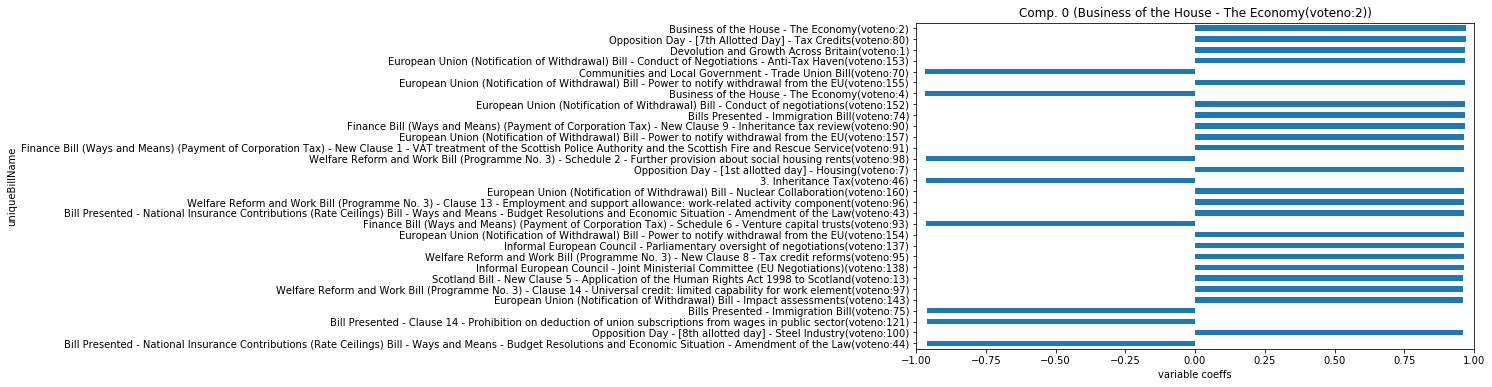

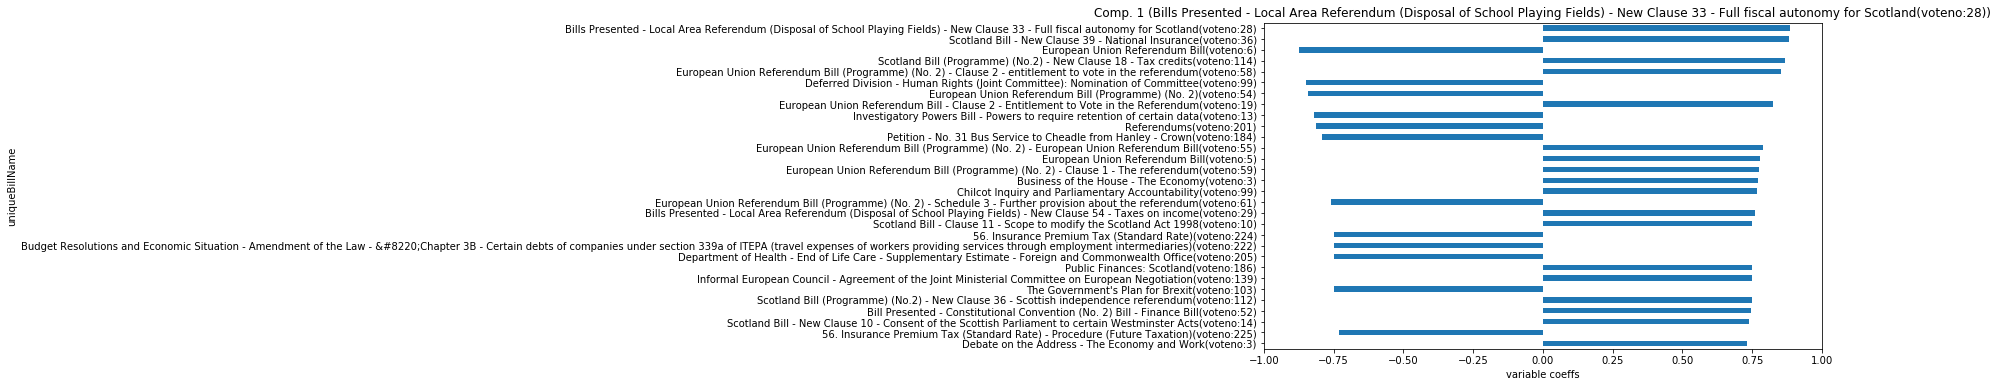

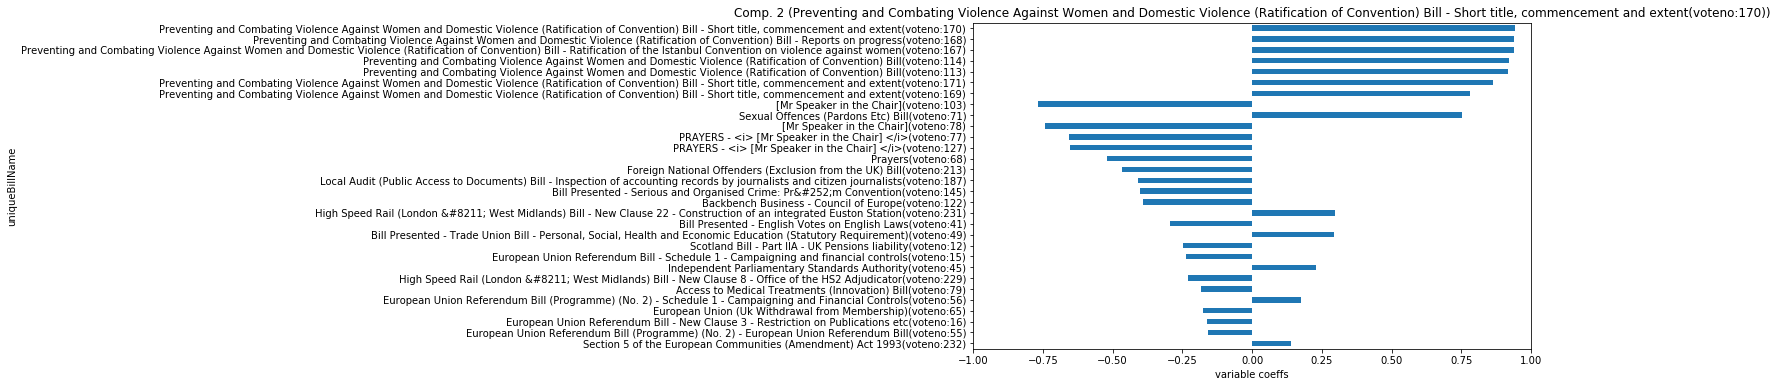

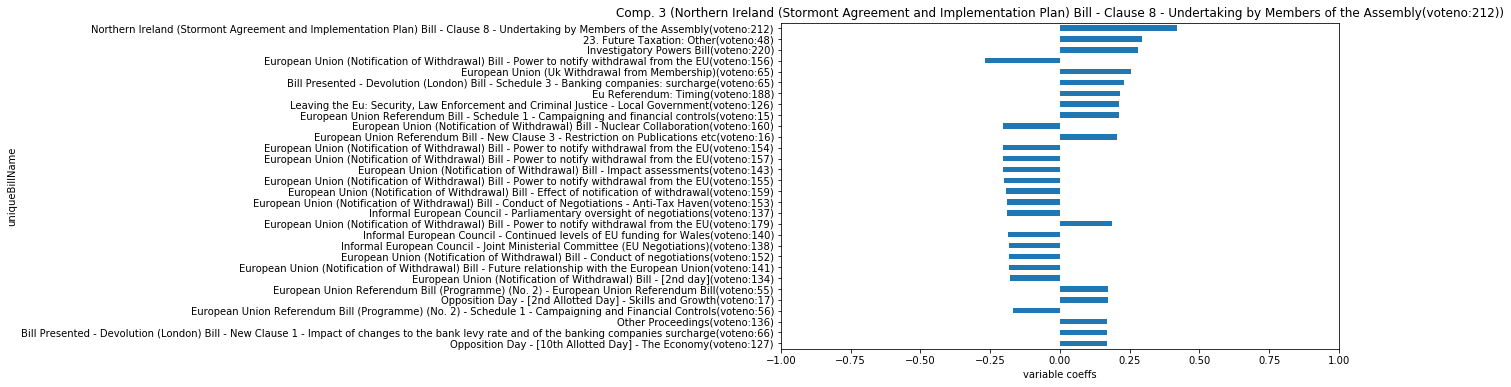

In [153]:
# %%time
from sklearn.decomposition import TruncatedSVD
# >>> from scipy.sparse import random as sparse_random
# >>> from sklearn.random_projection import sparse_random_matrix
# >>> X = sparse_random(100, 100, density=0.01, format='csr',
# ...                   random_state=42)

# normalise data (subtract out the mean, divide through by standard deviation)
clean_feature_set_std = StandardScaler().fit_transform(df.values )
BES_std = pd.DataFrame(      clean_feature_set_std,
                             columns = df_cols,
                             index   = df_ind      )


# 5 mins
## RUN (some variant of) PCA (potentially v slow!)
n_components = min(BES_std.shape[0],BES_std.shape[1])
# n_components = 20
# (svd_solver='full', n_components='mle',whiten=True)
# decomp = PCA(n_components = n_components,svd_solver='full')
# decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
# decomp = SparsePCA(n_components=n_components, alpha=2,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
#
# alpha=2 -> 1hr

decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
# decomp = TSNE(n_components=n_components, verbose=1, perplexity=40, n_iter=300)
# decomp = TruncatedSVD(n_components=n_components)
decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(BES_std)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = df_ind)


# treatdir = BES_data_folder+Treatment
# subdir = BES_data_folder+Treatment+decomp_method
load_suff = "FactorAnalysis"
save = True # False => Load

if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
    decomp_method = str(decomp).split("(")[0] 
    subdir = output_subfolder + decomp_method
    fname = subdir+ os.sep + decomp_method
    # create dir, save decomp object, BES_decomp, BES_std    
    if not os.path.exists(subdir): os.makedirs(subdir)
    with open(fname+".pkl", "wb") as f: pickle.dump( decomp, f )
    BES_decomp.to_hdf(fname+".hdf"        , decomp_method)
    BES_std.to_hdf(   fname+"_std"+".hdf" , decomp_method)
    
else: # LOAD decomp results (default is SAVE)
    decomp_method = load_suff
    subdir = output_subfolder + os.sep + decomp_method    
    fname = subdir + os.sep + decomp_method
    if not os.path.exists(subdir): raise Exception(subdir + ' does not exist!')
    # load decomp object, BES_decomp, BES_std, n_components
    with open(fname+".pkl", "rb") as f: decomp = pickle.load(f) 
    BES_decomp = pd.read_hdf(fname+".hdf")
    BES_std    = pd.read_hdf(fname+"_std"+".hdf")
    n_components = decomp.components_.shape[0] 

    
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          df_cols, BES_decomp, manifest, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 4, show_histogram = False)    

In [145]:
BES_decomp.shape

(654, 20)

In [84]:
# sns.lineplot(x=range(0,len(decomp.explained_variance_[0:10])),y=decomp.explained_variance_[0:10])

In [85]:
party_colour_dict = {"Lab":"red","LAB":"red",
                     "Con":'blue',"CON":'blue',"UKIP":"purple","LDem":"orange",
                     "Grn":'green',"Green":'green',
                     "BrexitParty":"cyan","BXP":'cyan',
                     "TIG":"pink","BNP":"magenta",
                     "SNP":'yellow',"PC":'olive',
                     "SPK":'black',"SPE":'black',
                     "OTH":'brown',
                     "UNKNOWN":'grey',"Independent":'grey',
                     "DUP":'magenta',"SDLP":'pink','UUP':'lightblue',
                     }

mps["party"].replace(party_colour_dict).value_counts()

blue         332
red          236
yellow        56
orange         9
magenta        8
grey           3
olive          3
pink           3
lightblue      2
green          1
purple         1
Name: party, dtype: int64

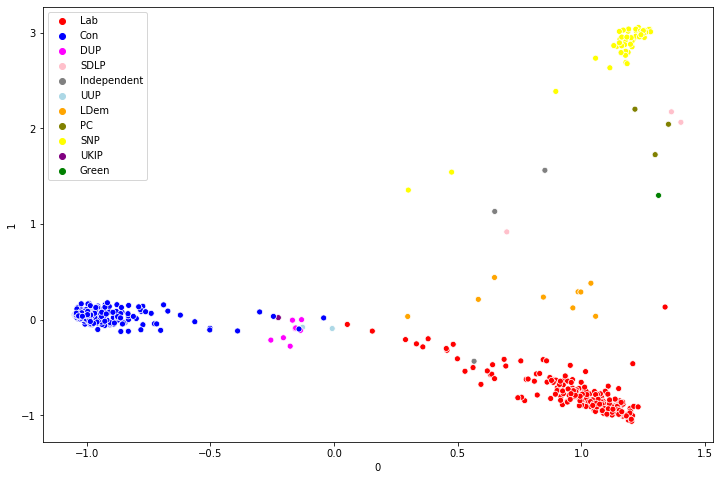

In [154]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=BES_decomp[0],y=BES_decomp[1], hue = mps["party"].values, palette=party_colour_dict );
# plt.title()

In [87]:
from sklearn.manifold import TSNE

In [178]:
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=3000)#, method='exact')
# tsne_results = tsne.fit_transform(BES_std)
tsne_results = tsne.fit_transform(df)
# tsne_results = tsne.fit_transform(BES_decomp)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
# BES_decomp = tsne_results
BES_decomp = pd.DataFrame(   tsne_results,
                             columns = range(0,2),
                             index   = df_ind)
# BES_decomp

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 654 samples in 0.016s...
[t-SNE] Computed neighbors for 654 samples in 0.297s...
[t-SNE] Computed conditional probabilities for sample 654 / 654
[t-SNE] Mean sigma: 0.894998
[t-SNE] KL divergence after 250 iterations with early exaggeration: 96.810249
[t-SNE] KL divergence after 3000 iterations: 1.232484
t-SNE done! Time elapsed: 18.093034744262695 seconds


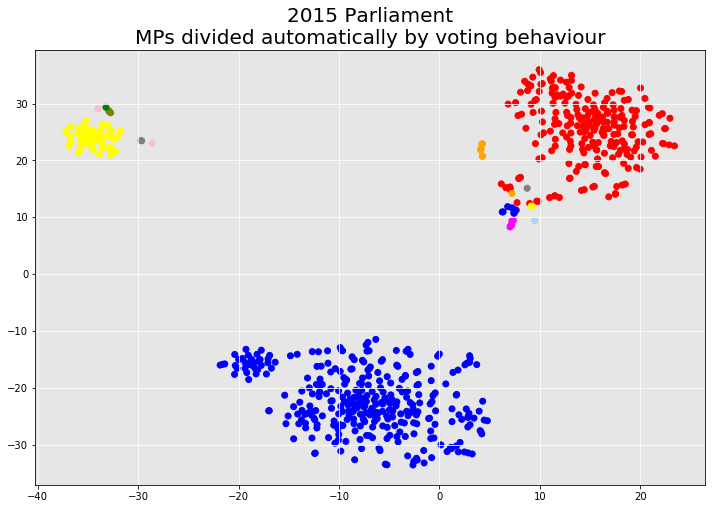

In [179]:
fig, ax = plt.subplots(subplot_kw=dict(facecolor='#E6E6E6'), figsize=(12,8))
N = 100
# scatter = sns.scatterplot(x=BES_decomp[0],y=BES_decomp[1], hue = mps["party"].values, palette=party_colour_dict, ax=ax );
scatter = ax.scatter(x=BES_decomp[0],y=BES_decomp[1],c=mps["party"].replace(party_colour_dict).values);
# scatter = ax.scatter(np.random.normal(size=N),
#                      np.random.normal(size=N),
#                      c=np.random.random(size=N),
#                      s=1000 * np.random.random(size=N),
#                      alpha=0.3,
#                      cmap=plt.cm.jet)
ax.grid(color='white', linestyle='solid')

ax.set_title("2015 Parliament\nMPs divided automatically by voting behaviour", size=20)

labels = mps["name"].values
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

# mpld3.show()
# mpld3.display()
mpld3.enable_notebook()

In [181]:
mpld3.save_html(fig,output_subfolder+"2015.html")

In [18]:
"""
Scatter Plot With Tooltips
==========================
A scatter-plot with tooltip labels on hover.  Hover over the points to see
the point labels.
Use the toolbar buttons at the bottom-right of the plot to enable zooming
and panning, and to reset the view.
"""
import matplotlib.pyplot as plt
import numpy as np
import mpld3

fig, ax = plt.subplots(subplot_kw=dict(facecolor='#E6E6E6'))
N = 100

scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s=1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)
ax.grid(color='white', linestyle='solid')

ax.set_title("Scatter Plot (with tooltips!)", size=20)

labels = ['point {0}'.format(i + 1) for i in range(N)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

# mpld3.show()
mpld3.display()

In [273]:
del mpld3

In [274]:
from importlib import reload  # Python 3.4+ only.
import mpld3

while True:
    # Do some things.
    if is_changed(mpld3):
        mpld3 = reload(mpld3)

NameError: name 'is_changed' is not defined

In [270]:
if 'mpld3' in sys.modules:  
    del sys.modules["mpld3"]

In [271]:
import mpld3
